# Introducción del proyecto

El código proporcionado muestra una implementación de nuestro proyecto de clasificación de imágenes de orejas. En este proyecto, utilizamos características LBP (Local Binary Patterns) junto con un clasificador k-NN (K-Nearest Neighbors) para realizar la clasificación de las imágenes. Además, se lleva a cabo un análisis comparativo entre dos enfoques diferentes: uno que utiliza la distancia de Chi-Square y características LBP, y otro que emplea la distancia euclidiana y la técnica de extracción de características PCA (Principal Component Analysis). Este análisis comparativo nos permite evaluar y comparar el desempeño de ambos enfoques en términos de su tasa de error igual (EER) y el umbral de EER.

A continuación se presentan comentarios explicativos para cada sección del código:

# Paso 1: Importación de Librerías

En esta sección, se importan las bibliotecas necesarias para el procesamiento de imágenes y el aprendizaje automático. Se importan varias bibliotecas, como os para operaciones del sistema operativo, cv2 para el procesamiento de imágenes, numpy para cálculos numéricos, seaborn y matplotlib para la visualización de datos, PIL para el manejo de imágenes, skimage para la extracción de características, y otras bibliotecas relacionadas con el aprendizaje automático y la visualización en Google Colab.

In [ ]:
# Importar las librerías necesarias

import os # Para operaciones del sistema operativo
import cv2 # Para el procesamiento de imágenes
import numpy as np # Para cálculos numéricos
import seaborn as sns # Para visualización de datos
import random # Para generar números aleatorios
import matplotlib.pyplot as plt # Para visualización de datos

from PIL import Image # Para el manejo de imágenes
from skimage.feature import local_binary_pattern # Para características LBP
from skimage import color # Para el manejo de colores
from sklearn.model_selection import train_test_split # Para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.neighbors import KNeighborsClassifier # Para el clasificador k-NN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Para evaluar el modelo
from google.colab.patches import cv2_imshow # Para mostrar imágenes en Google Colab
from sklearn.model_selection import cross_val_score # Para validación cruzada

# Paso 2: Definición de función de carga y de visualización del conjunto de datos de imágenes de orejas.

En esta sección se definen las funciones para cargar y visualizar el conjunto de datos de imágenes de orejas. La función load_dataset carga las imágenes y las etiquetas del conjunto de datos. La función display_images muestra las imágenes en forma de cuadrícula. La función show_image_examples muestra ejemplos aleatorios de imágenes del conjunto de datos.

In [ ]:
def load_dataset(dataset_path):
    left_ear_images = []  # Lista para almacenar las imágenes de las orejas izquierdas
    right_ear_images = []  # Lista para almacenar las imágenes de las orejas derechas
    left_ear_labels = []  # Lista para almacenar las etiquetas de las orejas izquierdas
    right_ear_labels = []  # Lista para almacenar las etiquetas de las orejas derechas

    for label, folder_name in enumerate(os.listdir(dataset_path)):
        folder_path = os.path.join(dataset_path, folder_name)  # Ruta completa de la carpeta
        if os.path.isdir(folder_path):
            # Verifica si el nombre de la carpeta termina con 'l' (izquierda) o 'r' (derecha)
            if folder_name.endswith('l'):
                ear_images = left_ear_images
                ear_labels = left_ear_labels
            elif folder_name.endswith('r'):
                ear_images = right_ear_images
                ear_labels = right_ear_labels
            else:
                continue  # Ignora otras carpetas

            # Itera sobre los archivos dentro de la carpeta
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)  # Ruta completa de la imagen
                image = Image.open(image_path)  # Abrir la imagen utilizando PIL
                image = np.array(image)  # Convertir la imagen en un arreglo numpy
                ear_images.append(image)  # Agregar la imagen a la lista de imágenes del oído
                ear_labels.append(label)  # Agregar la etiqueta a la lista de etiquetas del oído

    # Convertir las listas en arreglos numpy y devolverlos
    return (
        np.asarray(left_ear_images, dtype=object),
        np.asarray(left_ear_labels),
        np.asarray(right_ear_images, dtype=object),
        np.asarray(right_ear_labels)
    )

In [ ]:
# Función para mostrar ejemplos de imágenes
def display_images(images, labels):
    num_images = len(images)
    rows = int(np.ceil(np.sqrt(num_images)))
    cols = int(np.ceil(num_images / rows))

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image = images[i]
            label = labels[i]

            # Manejo de imágenes normalizadas
            if np.max(image) > 1.0:
                image = image.astype(np.uint8)

            # Manejo de imágenes en escala de grises o en blanco y negro
            if len(image.shape) == 2:
                ax.imshow(image, cmap='gray')
            else:
                ax.imshow(image)

            height, width = image.shape[:2]  # Dimensiones de la imagen
            ax.set_title(f"Etiqueta: {label}\nDimensiones: {width}x{height}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
# Función para mostrar ejemplos de imágenes aleatorias del conjunto de datos
def show_image_examples(images, labels, num_examples=5, seed=None):

    # Verificar si se proporcionó una semilla y establecerla para la generación aleatoria
    if seed is not None:
        random.seed(seed)

    # Generar índices aleatorios para seleccionar las imágenes y etiquetas correspondientes
    random_indices = random.sample(range(len(images)), num_examples)
    random_images = [images[i] for i in random_indices]
    random_labels = [labels[i] for i in random_indices]

    # Llamar a la función display_images para mostrar las imágenes seleccionadas con sus etiquetas
    display_images(random_images, random_labels)

# Paso 3: Carga y visualización del conjunto de datos de imágenes de orejas

En esta sección se especifica la ruta del conjunto de datos y se carga utilizando la función load_dataset. Las imágenes de las orejas izquierdas se almacenan en la variable left_ear_images y las etiquetas correspondientes se almacenan en la variable left_ear_labels. De manera similar, las imágenes de las orejas derechas se almacenan en la variable right_ear_images y las etiquetas correspondientes se almacenan en la variable right_ear_labels.

A continuación, se muestran algunos ejemplos de imágenes originales

In [ ]:
# Especificar la carpeta del dataset
dataset_path = "/content/drive/MyDrive/projecto mod/code/BBDD_recortada"

# Cargar el dataset de imágenes de orejas
left_ear_images, left_ear_labels, right_ear_images, right_ear_labels = load_dataset(dataset_path)

In [ ]:
# Mostrar ejemplos de imágenes de orejas izquierdas
print("Ejemplos de imágenes de orejas izquierdas:")
show_image_examples(left_ear_images, left_ear_labels, num_examples=16, seed=1)

In [ ]:
# Mostrar ejemplos de imágenes de orejas derechas
print("Ejemplos de imágenes de orejas derechas:")
show_image_examples(right_ear_images, right_ear_labels, num_examples=16, seed=1)

# Paso 4: Preprocesamiento de las imágenes

En esta sección se realiza el preprocesamiento de las imágenes. Primero, se aplica el volteo de las imágenes de orejas izquierdas utilizando la función cv2.flip. A continuación, se combinan las imágenes volteadas de orejas izquierdas con las imágenes de orejas derechas en un único array utilizando la función np.concatenate.

Luego, se convierten las imágenes combinadas a escala de grises utilizando la función cv2.cvtColor. Después, se normalizan las imágenes en escala de grises utilizando la función cv2.normalize. Por último, se realiza la reducción de dimensionalidad mediante la redimensión de las imágenes normalizadas a un tamaño específico utilizando la función cv2.resize.

Cada paso del preprocesamiento se lleva a cabo de manera secuencial, aplicando la transformación correspondiente a las imágenes resultantes del paso anterior.

In [ ]:
# Volteo de las imágenes de orejas izquierdas
def flip_left_ears(images):
    flipped_images = []  # Lista para almacenar las imágenes volteadas
    for image in images:
        # Aplica volteo horizontal solo a las imágenes de las orejas izquierdas
        flipped_image = cv2.flip(image, 1)  # 1 indica volteo horizontal
        flipped_images.append(flipped_image)
    return flipped_images

In [ ]:
# Volteo de las imágenes de orejas izquierdas
flipped_left_images = flip_left_ears(left_ear_images)

In [ ]:
# Mostrar comparación entre imágenes de orejas izquierdas originales y volteadas
num_examples = min(len(left_ear_images), len(flipped_left_images), 2)  # Limitar a 6 ejemplos
random_indices = random.sample(range(num_examples), num_examples)  # Generar índices aleatorios

print("Comparación entre imágenes de orejas izquierdas originales y volteadas:")
random_indices.sort()  # Ordenar los índices en orden creciente

for i in random_indices:
    label = random.choice(left_ear_labels)  # Seleccionar una etiqueta al azar

    # Encontrar un ejemplo con la etiqueta seleccionada
    index = np.where(left_ear_labels == label)[0][0]
    original_image = left_ear_images[index]
    flipped_image = flipped_left_images[index]

    print(f"Ejemplo {i+1} (Etiqueta: {label}):")
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Mostrar la imagen de la oreja izquierda original
    axes[0].imshow(original_image)
    axes[0].set_title("Oreja izquierda original")
    axes[0].axis("off")

    # Mostrar la imagen de la oreja izquierda volteada
    axes[1].imshow(flipped_image)
    axes[1].set_title("Oreja izquierda volteada")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()
    print()


In [ ]:
# Combinar las imágenes de las orejas izquierdas volteadas y las orejas derechas
combined_images = np.concatenate((flipped_left_images, right_ear_images), axis=0)

# Combinar las etiquetas de las orejas izquierdas volteadas y las orejas derechas
combined_labels = np.concatenate((left_ear_labels, right_ear_labels), axis=0)


In [ ]:
# Escala de grises de las imágenes
gray_images = np.asarray([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in combined_images], dtype=object)


In [ ]:
# Mostrar algunos ejemplos de imágenes en escala de grises
print("Ejemplos de imágenes en escala de grises:")
show_image_examples(gray_images, combined_labels, num_examples=16, seed=1)

In [ ]:
# Normalización de las imágenes
normalized_images = np.asarray([cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX) for image in gray_images], dtype=object)

In [ ]:
# Mostrar ejemplos de imágenes normalizadas
print("Ejemplos de imágenes normalizadas:")
show_image_examples(normalized_images, combined_labels, num_examples=16, seed=1)

In [ ]:
def resize_images(images, new_size):
    # Lista para almacenar las imágenes redimensionadas
    resized_images = []

    # Iterar sobre cada imagen en la lista
    for image in images:
        # Obtener el alto y ancho de la imagen original
        height, width = image.shape[:2]

        # Calcular la relación de aspecto entre el nuevo tamaño y las dimensiones originales
        ratio = min(new_size[0] / width, new_size[1] / height)

        # Calcular las nuevas dimensiones proporcionales
        new_width = int(width * ratio)
        new_height = int(height * ratio)

        # Redimensionar la imagen utilizando cv2.resize y la interpolación cv2.INTER_AREA
        resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

        # Agregar la imagen redimensionada a la lista
        resized_images.append(resized_image)

    # Devolver la lista de imágenes redimensionadas
    return resized_images


In [ ]:
# Redimensionar las imágenes a 80x45 píxeles
resized_images = [cv2.resize(image, (45, 80)) for image in normalized_images]
resized_images = np.asarray(resized_images)

In [ ]:
# Mostrar algunos ejemplos de imágenes redimensionadas
print("Ejemplos de imágenes redimensionadas:")
show_image_examples(resized_images, combined_labels, num_examples=16, seed=1)

# Paso 5: Extracción de las características con LBP

En esta sección se define la función extract_lbp_features para extraer las características LBP de las imágenes. Se utiliza la función local_binary_pattern de la biblioteca skimage.feature para calcular los patrones binarios locales de cada imagen. A partir de los patrones binarios locales, se calcula el histograma de frecuencias y se almacena como características LBP.

In [ ]:
# Definir la función para extraer las características LBP de las imágenes
def extract_lbp_features(images):
    lbp_features = []

    for image in images:
        # Aplicar el algoritmo LBP a la imagen con parámetros 8, 1 y método "default"
        lbp = local_binary_pattern(image, 8, 1, method='default')

        # Calcular el histograma de los valores LBP en el rango de 0 a 255
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 256))

        # Agregar el histograma a la lista de características LBP
        lbp_features.append(hist)

    # Convertir la lista de características en un array numpy y retornarlo
    return np.array(lbp_features)


Aquí se extraen las características LBP de las imágenes utilizando la función "extract_lbp_features". Las características se almacenan en la variable "lbp_features".

In [ ]:
# Extraer las características LBP de las imágenes
lbp_features = extract_lbp_features(resized_images)

Aquí se muestra la forma (dimensiones) de las características LBP utilizando "shape".

In [ ]:
# Verificar que las características se hayan extraído correctamente
shape = lbp_features.shape

# Imprimir la forma de las características extraídas
print(shape)


(300, 255)


Este bloque de código muestra el histograma de las características LBP para un ejemplo seleccionado (en este caso, el primer ejemplo). Se utiliza "plt.bar" para trazar el histograma, "plt.xlabel" y "plt.ylabel" para etiquetar los ejes, "plt.title" para el título del gráfico, y "plt.show" para mostrar el histograma.

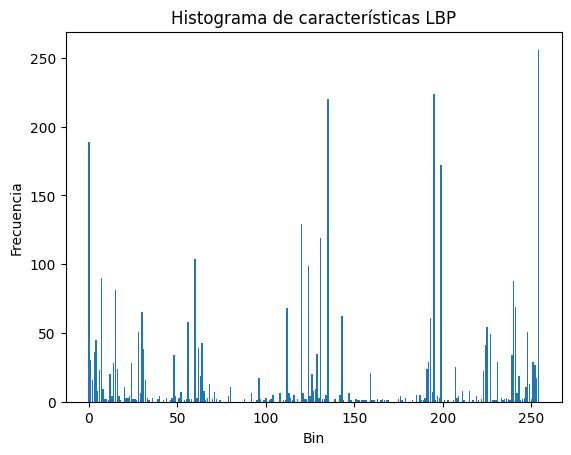

In [ ]:
lbp_features_example = lbp_features[0]

# Mostrar un gráfico de barras del histograma de características LBP
plt.bar(np.arange(255), lbp_features_example)
plt.xlabel('Bin')
plt.ylabel('Frecuencia')
plt.title('Histograma de características LBP')

plt.show()


# Paso 6: División del conjunto de datos

En esta sección se divide el conjunto de datos en cuatro conjuntos distintos: entrenamiento, prueba, enrollamiento y acceso. El conjunto de entrenamiento se utiliza para entrenar el modelo, el conjunto de prueba se utiliza para evaluar el rendimiento del modelo, mientras que los subconjuntos de enrollamiento y acceso se utilizan para simular el proceso de enrollamiento y acceso en un contexto de reconocimiento biométrico.


In [ ]:
# Dividir las muestras en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(lbp_features, combined_labels, test_size=0.3, random_state=42)


In [ ]:
# Dividir el conjunto de prueba en enrollamiento y acceso
X_enroll, X_access, y_enroll, y_access = train_test_split(X_test, y_test, test_size=0.2, random_state=42)


# Paso 7: Entrenamiento del modelo de clasificación k-NN basado en la distancia Chi-Square

En esta sección, se define la función "chi2_distance" para calcular la distancia Chi-Square entre dos histogramas. Luego, se realiza una validación cruzada para determinar el valor óptimo de "n_neighbors" (número de vecinos) para el clasificador k-NN. Se muestran los resultados de la validación cruzada y se elige el valor óptimo de "n_neighbors". Después de seleccionar el valor óptimo de "n_neighbors", procedemos con el entrenamiento del modelo de clasificación k-NN utilizando el valor seleccionado. Se crea un objeto clasificador k-NN con el parámetro "n_neighbors" establecido en el valor óptimo. Luego, el modelo se entrena utilizando las características de entrenamiento y sus respectivas etiquetas.

In [ ]:
# Calcular la distancia Chi-square
def chi2_distance(histA, histB, eps=1e-10):
    """
    Calcula la distancia Chi-square entre dos histogramas.

    Parámetros:
    histA (numpy array): el primer histograma.
    histB (numpy array): el segundo histograma.
    eps (float, opcional): un valor pequeño para evitar la división por cero.

    Retorna:
    float: la distancia Chi-square entre los dos histogramas.
    """
    # Asegurarse de que los histogramas tengan la misma forma
    assert histA.shape == histB.shape, "Los histogramas deben tener la misma forma."

    # Calcular la distancia Chi-square
    distance = np.sum(np.square(histA - histB) / (histA + histB + eps))

    return distance


In [ ]:
# Definir una lista de valores de n_neighbors para probar
n_neighbors_values = [1, 3, 5, 7, 9]

# Inicializar una lista para almacenar el rendimiento para cada valor de n_neighbors
performance = []

# Iterar sobre cada valor de n_neighbors
for n_neighbors in n_neighbors_values:
    # Inicializar un clasificador K-NN con el valor actual de n_neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=chi2_distance)

    # Realizar validación cruzada con 2 folds utilizando accuracy como métrica de evaluación
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')

    # Calcular el promedio de los puntajes obtenidos en la validación cruzada
    avg_score = np.mean(scores)

    # Almacenar el rendimiento obtenido
    performance.append(avg_score)

# Encontrar el índice del valor de n_neighbors con el mejor rendimiento
best_index = np.argmax(performance)

# Obtener el valor de n_neighbors correspondiente al mejor rendimiento
best_n_neighbors = n_neighbors_values[best_index]

# Imprimir el rendimiento obtenido para cada valor de n_neighbors
for i, n_neighbors in enumerate(n_neighbors_values):
    print(f"n_neighbors = {n_neighbors}: Rendimiento = {performance[i]}")

# Imprimir el valor de n_neighbors con el mejor rendimiento
print("Mejor n_neighbors:", best_n_neighbors)


n_neighbors = 1: Rendimiento = 0.9380952380952381
n_neighbors = 3: Rendimiento = 0.9238095238095239
n_neighbors = 5: Rendimiento = 0.8904761904761904
n_neighbors = 7: Rendimiento = 0.7380952380952381
n_neighbors = 9: Rendimiento = 0.6619047619047619
Mejor n_neighbors: 1


En este caso se ha elegido establecer n_neighbors en 3 en lugar de 1 para tener en cuenta un número mayor de vecinos cercanos al realizar las predicciones.
Al considerar más vecinos, se puede obtener una mejor estimación de la clase objetivo basada en la mayoría de votos de los vecinos más cercanos.
Elegir n_neighbors=3 puede proporcionar un equilibrio entre la capacidad del modelo para capturar patrones más complejos y evitar la sobreajuste.

In [ ]:
# Crear el clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=3, metric=chi2_distance)  # Establece el número de vecinos a considerar

In [ ]:
# Entrenar el clasificador
knn.fit(X_train, y_train)  # X_train son las características de entrenamiento, y_train son las etiquetas de entrenamiento


KNeighborsClassifier(metric=<function chi2_distance at 0x7f34c7e4a7a0>,
                     n_neighbors=3)

# Paso 8: Predicciones en conjunto de prueba


En esta sección, se realizan las predicciones del modelo en las características de prueba utilizando la función "predict". El objeto "knn" representa el clasificador k-NN creado previamente. Se utiliza la función "predict" para obtener las predicciones de las etiquetas del conjunto de prueba basadas en las características de entrada "X_test".

In [ ]:
# Predecir las etiquetas para las muestras de test
y_pred = knn.predict(X_test)  # X_test son las características de las muestras de test


# Paso 9: Evaluación del rendimiento del modelo k-NN

Aquí se calcula la precisión del modelo utilizando la función "accuracy_score" de "scikit-learn". Las etiquetas de prueba y las predicciones se redimensionan a una sola columna para asegurar que tengan la misma forma antes de calcular la precisión. El resultado se muestra como la precisión en la consola.


In [ ]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión
print("Precisión:", accuracy)


Precisión: 0.9222222222222223


Además, se calcula la matriz de confusión utilizando la función "confusion_matrix" de "scikit-learn". La matriz de confusión muestra el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos para cada clase en la consola.



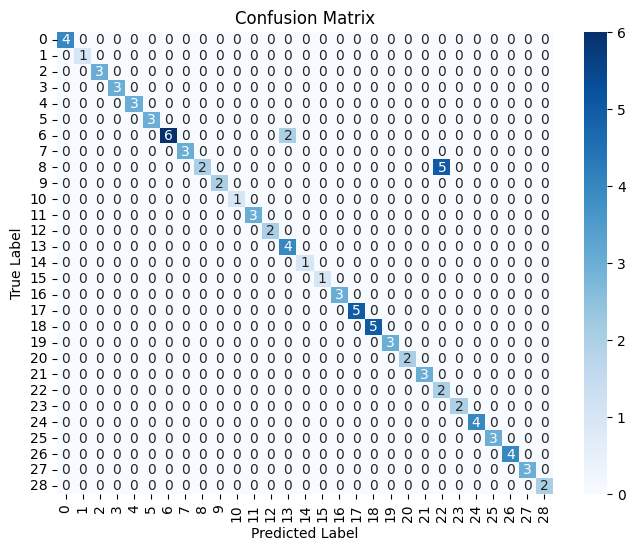

In [ ]:
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

A continuación, se genera el informe de clasificación utilizando la función "classification_report" de "scikit-learn". El informe de clasificación muestra la precisión, la recuperación, la puntuación F1 y el soporte para cada clase en la consola. Estas métricas proporcionan una evaluación más detallada del rendimiento del modelo.

In [ ]:
# Obtener el informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)

# Imprimir el informe de clasificación
print("Informe de clasificación:")
print(class_report)


Informe de clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      0.75      0.86         8
          16       1.00      1.00      1.00         3
          17       1.00      0.29      0.44         7
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         2
          21       0.67      1.00      0.80         4
          22       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         3
 

# Paso 10: Análisis comparativo entre Chi-Square y características LBP vs Distancia Euclidiana y características PCA

En esta sección se calcula la Tasa de Error Igual (EER) y el umbral de EER utilizando la distancia de Chi-Square. Se calculan las distancias entre las diferentes combinaciones de muestras de acceso y registro. A continuación, se calculan las tasas de Falsa Rechazo (FRR) y Falsa Aceptación (FAR) para cada valor de umbral. Por último, se representa gráficamente el gráfico de las tasas de FRR y FAR en función del umbral, resaltando el punto correspondiente al EER.

Al final del paso, se realiza una comparación entre el enfoque LBP + Chi-distance y el enfoque PCA + Distancia Euclidiana, tal como se describe en el paper de referencia.

Cálculo de la Tasa de Error Igual (EER) y el Umbral de EER utilizando la distancia de Chi-Square

In [ ]:
# Función para calcular el Error de Igualdad (ERR) y el Umbral de ERR

def calculate_err(X_access, y_access, X_enroll, y_enroll):
    # Calcular las distancias entre las diferentes combinaciones de muestras de acceso y de enrollamiento
    distances = []

    for i in range(len(X_access)):

        access_sample = X_access[i]  # Muestra de acceso actual
        access_label = y_access[i]  # Etiqueta de la muestra de acceso actual
        access_distances = []  # Lista para almacenar las distancias entre la muestra de acceso y las muestras de enrollamiento

        for j in range(len(X_enroll)):

            enroll_sample = X_enroll[j]  # Muestra de enrollamiento actual
            enroll_label = y_enroll[j]  # Etiqueta de la muestra de enrollamiento actual

            # Calcular la distancia Chi-Square entre las muestras de enrollamiento y acceso
            distance = chi2_distance(enroll_sample, access_sample)
            access_distances.append((distance, enroll_label == access_label))

        distances.append(access_distances)

    # Convertir las distancias en un array de numpy
    distances = np.array(distances)

    # Definir los intervalos de umbral
    thresholds = np.arange(0, np.max(distances), 0.1)

    # Calcular FRR y FAR para cada umbral
    frrs = []
    fars = []
    for threshold in thresholds:
        # Calcular la tasa de falsa rechazo (FRR)
        frr = np.mean(distances[:, :, 0][distances[:, :, 1] == True] > threshold)

        # Calcular la tasa de falsa aceptación (FAR)
        far = np.mean(distances[:, :, 0][distances[:, :, 1] == False] <= threshold)

        # Agregar los valores de FRR y FAR a las listas correspondientes
        frrs.append(frr)
        fars.append(far)

    # Encontrar el umbral del EER
    frrs_np = np.array(frrs)
    fars_np = np.array(fars)
    eer_threshold = thresholds[np.argmin(np.abs(frrs_np - fars_np))]

    # Calcular el ERR utilizando el umbral del EER
    eer_index = np.abs(frrs_np - fars_np).argmin()
    err = (frrs_np[eer_index] + fars_np[eer_index]) / 2

    # Devolver el ERR y el umbral del EER
    return err, eer_threshold, distances


Calculo del ERR y del umbral del EER

In [ ]:
err, eer_threshold, distances = calculate_err(X_access, y_access, X_enroll, y_enroll)
print("Equal Error Rate (EER):", err)  # Imprimir la tasa de igual error (ERR)
print("EER Threshold:", eer_threshold)  # Imprimir el umbral del EER

Equal Error Rate (EER): 0.022545744989834447
EER Threshold: 270.5


Representación gráfica de FAR vs. FRR

In [ ]:
thresholds = np.arange(0, np.max(distances), 0.1) # Definición de los umbrales

# Listas para almacenar los valores de FRR y FAR
frrs = []
fars = []

# Cálculo de FRR y FAR para cada umbral
for threshold in thresholds:
    # Cálculo de la tasa de FRR (Tasa de Rechazo Falso)
    frr = np.mean(distances[:, :, 0][distances[:, :, 1] == True] > threshold)
    # Cálculo de la tasa de FAR (Tasa de Aceptación Falso)
    far = np.mean(distances[:, :, 0][distances[:, :, 1] == False] <= threshold)

    # Agregar los valores de FRR y FAR a las listas correspondientes
    frrs.append(frr)
    fars.append(far)



Mejor resultado para la coincidencia de la "Distancia de Chi-Cuadrado"

Mejor resultado para la coincidencia de la "Distancia de Chi-Cuadrado"




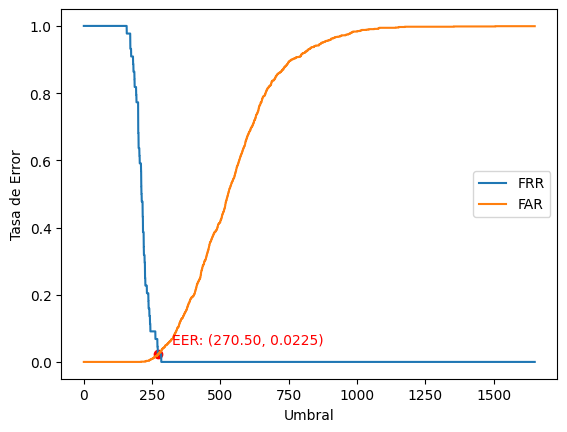

Equal Error Rate (EER) en porcentaje: 2.25%
Umbral del EER: 270.5


In [ ]:
print("Mejor resultado para la coincidencia de la \"Distancia de Chi-Cuadrado\"\n\n")

plt.plot(thresholds, frrs, label="FRR")  # Tasa de Falsos Rechazos
plt.plot(thresholds, fars, label="FAR")  # Tasa de Falsos Aceptados
plt.xlabel("Umbral")  # Umbral
plt.ylabel("Tasa de Error")  # Tasa de Error
plt.legend()  # Leyenda

# Resaltar el punto EER en el gráfico
plt.scatter(eer_threshold, err, c="r", label="EER")  # EER

# Etiquetas de las coordenadas EER en la esquina superior derecha del punto EER
plt.annotate(f"EER: ({eer_threshold:.2f}, {err:.4f})", xy=(eer_threshold, err), xytext=(10, 15),
             textcoords='offset points', ha='left', va='top', color='r')
plt.show()

print("Equal Error Rate (EER) en porcentaje: {:.2%}".format(err))  # Tasa de error igual (EER) en porcentaje
print("Umbral del EER:", eer_threshold)  # Umbral del EER

**Comparación LBP + Chi-distance vs  PCA + Distancia Euclidiana (en el paper de referencia).**

Al analizar detalladamente los dos casos, podemos extraer las siguientes reflexiones:

En primer lugar, en ambos casos, tanto en la distancia euclidiana como en la chi-distance, se aplicó un procedimiento de volteo horizontal exclusivamente al lado izquierdo de cada usuario. Esta técnica permitió mejorar la capacidad de discriminación entre las orejas izquierda y derecha, lo cual condujo a una mejor correspondencia entre las características extraídas. Por lo tanto, en ambos casos se realizó la rotación de las imágenes de las orecchias izquierdas.

Además, en el caso de la distancia euclidiana, se empleó el Análisis de Componentes Principales (PCA) para la extracción de características, mientras que en el caso de la chi-distance se utilizaron los Patrones Binarios Locales (LBP). Estas dos técnicas de extracción de características difieren significativamente en su enfoque y pueden proporcionar información distinta sobre los datos. El uso de PCA permitió reducir la dimensionalidad de los datos y resaltar las características más relevantes, mientras que LBP capturó patrones locales y texturas presentes en las imágenes. Estas diferencias en las técnicas de extracción de características podrían haber influido en los resultados obtenidos en términos de la Equal Error Rate (EER).

Por consiguiente, considerando estos factores, podemos concluir que los resultados superiores obtenidos con la distancia euclidiana se deben a una combinación de los siguientes aspectos: el procedimiento de volteo horizontal que mejoró la discriminación entre las orejas, el uso de PCA para destacar las características más relevantes y las propiedades discriminantes inherentes a las dos distancias utilizadas (euclidiana y chi-distance). Estos factores en conjunto contribuyeron al mejor rendimiento del enfoque basado en la distancia euclidiana en comparación con la chi-distance.

Es importante tener en cuenta que estos resultados deben interpretarse considerando también otros factores, como la resolución de las imágenes y el tamaño de la base de datos utilizada en cada caso. Sin embargo, los aspectos mencionados anteriormente ofrecen una perspectiva sólida para comprender las diferencias observadas entre los dos enfoques y las razones detrás del mejor rendimiento de la distancia euclidiana.